In [42]:
import matplotlib.pyplot as plt
import random
import numpy as np
import math
import pandas as pd

n = 1000000  #直接抽样数
N = [2, 5, 10]
m = 10000 #验证中心极限定理时的采样量

### 通用函数：用于计算及画图中心极限定理中的量

In [43]:
def calculate_X(x, N, miu, sigma):
    X = np.zeros(m)
    for i in range(m):
        a = x[i]
        for j in range(N-1):
            a += x[i+m*(j+1)]
        X[i] = (a/N-miu)/sigma*math.sqrt(N)

    return X

def plot_result(x, miu, sigma, name, discrete=False):

    fig, ax = plt.subplots(2, 2, dpi=300)
    ax = ax.reshape(4)

    #标准正态分布
    x_gauss = np.linspace(-10, 10, 200, dtype=float)
    y_gauss = np.exp(-x_gauss**2/2)/np.sqrt(2*np.pi)

    #对离散数据，降低直方图密度
    if discrete:
        num_bins = 40
    else:
        num_bins = 100
    
    for i,num in enumerate(N):
        #回执直方图展示中心极限定理
        ax[i].hist(calculate_X(x, num, miu, sigma), bins=num_bins, density=True,
                   alpha=0.5, range=(-10, 10), label=name+" Histogram")
        ax[i].plot(x_gauss, y_gauss, '--', label="Normal Gaussian")
        ax[i].set_xlabel('Value')
        ax[i].set_ylabel('P')
        ax[i].set_title("N={}".format(num))
        ax[i].legend(loc='best', frameon=False)

    plt.show()

### 指数分布

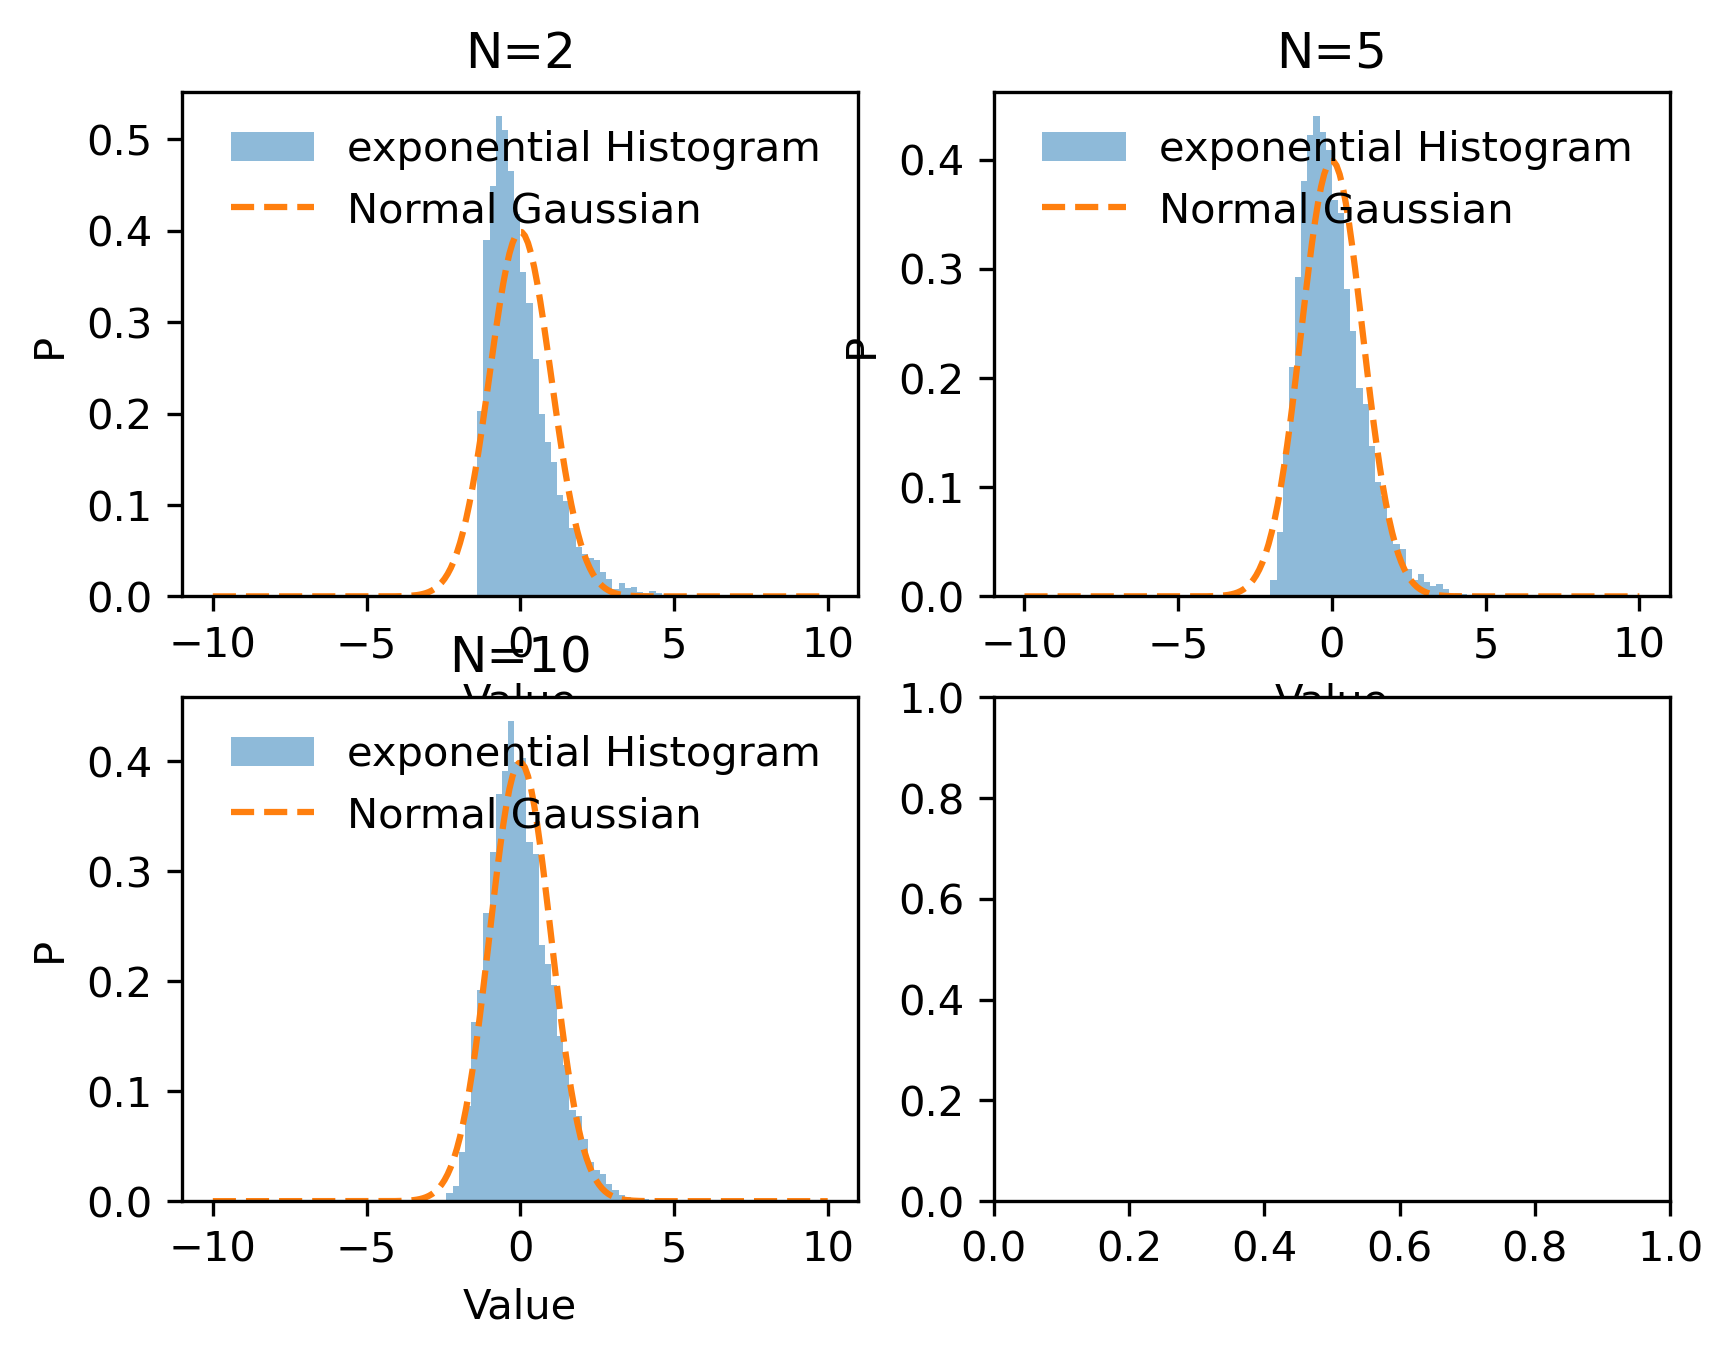

In [44]:
r1 = np.array([random.uniform(0, 1) for _ in range(n)])

x1 = -np.log(1-r1)

plot_result(x1, 1, 1, 'exponential')

### 泊松分布

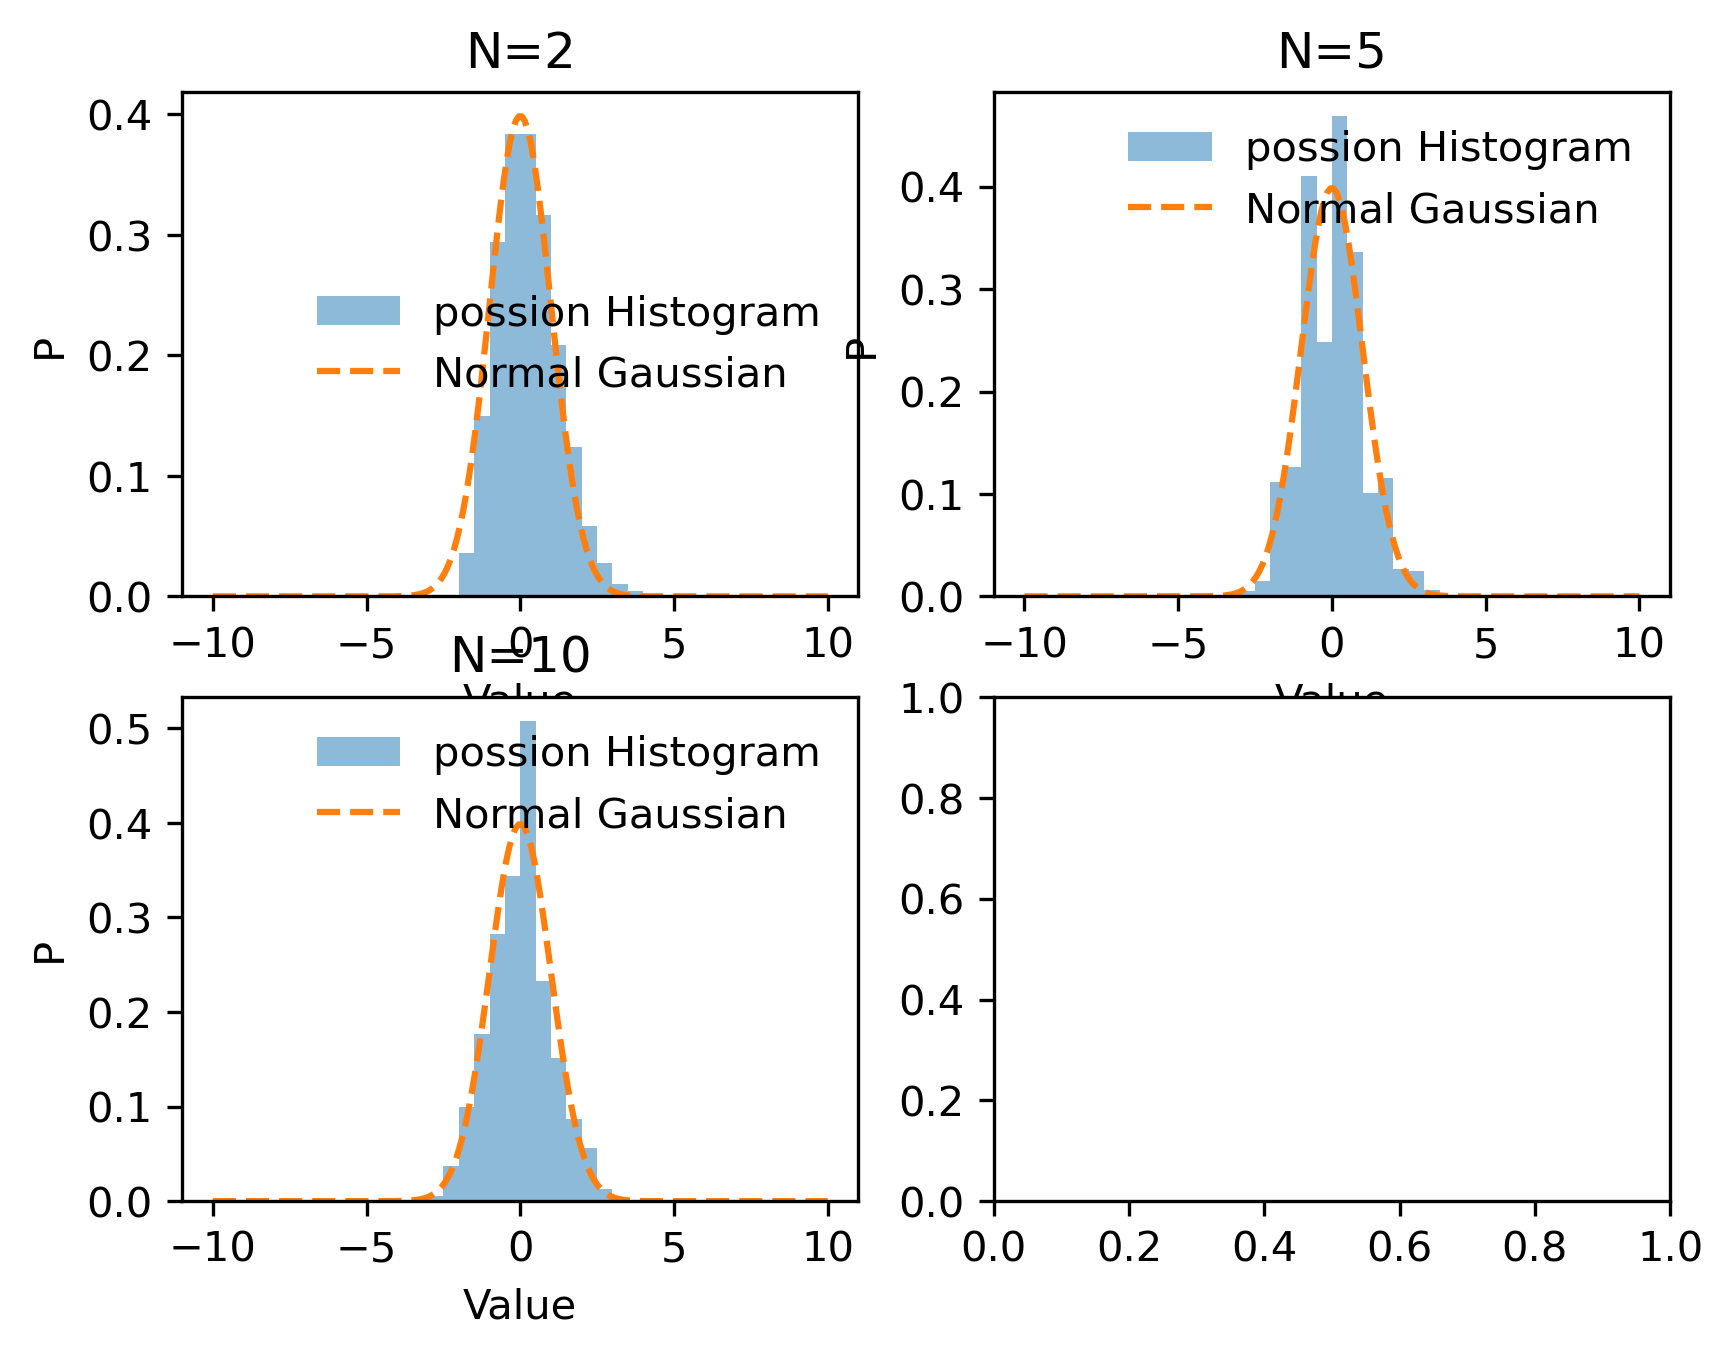

In [45]:
r2 = np.array([random.uniform(0, 1) for _ in range(n)])

#只对100以内采样，更大的均取100
p = np.array([math.exp(-2)*2**i/math.factorial(i) for i in range(101)])
p_cum = [np.sum(p[:i+1]) for i in range(101)]
p_cum[100] = 1

x2 = np.zeros(n)
for i in range(n):
    for j,pi in enumerate(p_cum):
        if r2[i] <= pi:
            x2[i] = j
            break

plot_result(x2, 2, math.sqrt(2), "possion", discrete=True)

### 均匀分布

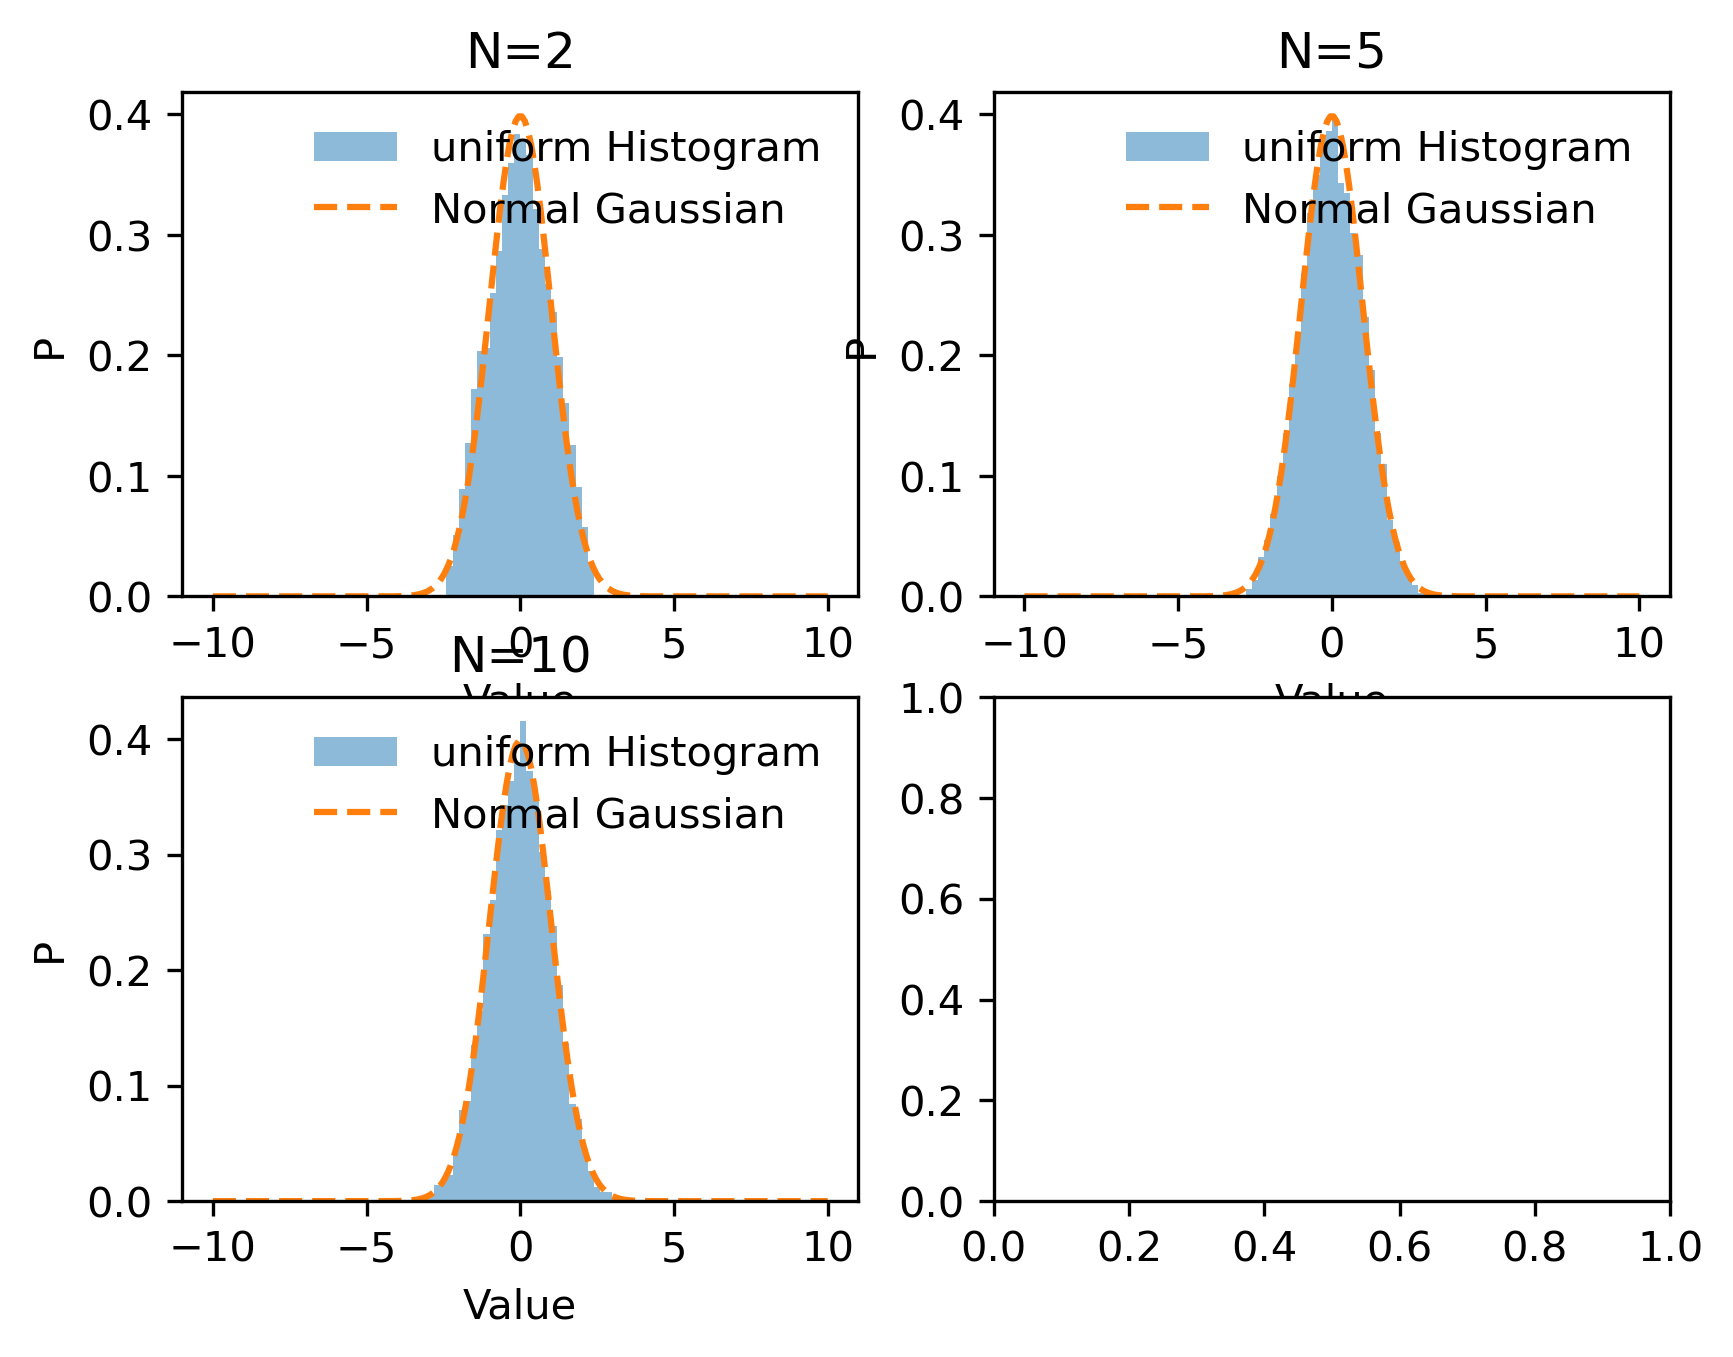

In [46]:
x3 = np.array([random.uniform(0, 1) for _ in range(n)])

plot_result(x3, 0.5, math.sqrt(1/12), 'uniform')